# **Project 2**, APS1070 Fall 2023
**Anomaly Detection Algorithm using Gaussian Mixture Model**

**Deadline: OCT 27, 11 PM**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Name: Chuhan Chen
*   Student Number:n 1006057213

### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858



In [102]:
%%shell
jupyter nbconvert --to html /content/APS1070_Project_2_Chuhan_Chen.ipynb


[NbConvertApp] Converting notebook /content/APS1070_Project_2_Chuhan_Chen.ipynb to html
[NbConvertApp] Writing 3228235 bytes to /content/APS1070_Project_2_Chuhan_Chen.html


##**Part 1: Getting started [1.5 Marks]**

We are going to work with a [credit card fraud detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud) dataset, consisting of transactions made by credit cards in September 2013 by European cardholders. The dataset contains only numerical input variables (`V1`, `V2`, … `V28`) which are the principal components obtained with PCA transformation (PCA will the introduced later in this course), due to confidentiality issues. The only features which have not been transformed with PCA are `Time` (seconds elapsed between each transaction and the first transaction in the dataset) and `Amount` (transaction Amount).\
This dataset contains 30 key features, which are not
directly interpretable but contain meaningful information about the dataset.
Load the dataset in CSV file using Pandas. The dataset is called `creditcard.csv`. Print out the first few columns of the dataset.

* How many rows are there? __284807___ **[0.1]**
* Which column contains the targets? 'Class' **[0.1]**
* What is the meaning of target values?__0 means not fraud, 1 means fraud___ **[0.2]**

In [10]:
pip install wget

In [11]:
import wget

wget.download('https://raw.githubusercontent.com/Sabaae/Dataset/master/creditcard.csv')

'creditcard (1).csv'

In [12]:
!pip install numpy==1.21.4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
### YOUR CODE HERE ###
df = pd.read_csv("creditcard.csv")

In [14]:
print(df)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

In [15]:
percentage = df['Class'].value_counts(normalize=True) * 100
print(percentage)

0    99.827251
1     0.172749
Name: Class, dtype: float64


It's important to know how many examples we have for each class when we work with a new dataset.

* What is the percentage of entries in the dataset for each class? _**'0': 99.827251%, '1':0.172749%**____ **[0.1]**
* Is this data considered balanced or unbalanced? Why is this the case?__**This data is considered unbalanced since 0 takes about 99.82%, highly overwheelming.__ **[0.1]**
* Why is balance/imbalance important? How might this class ditribution affect a KNN classifier for example, which we explored in Project 1? _**Data unbalance leads to biased model. The majority class will have better performance in the prediction, while the minority class will have poor performancealso. The unbalanced model will highly affect the KNN classifier, since the KNN classifier is based on the distance to classify. The majority class will dominate the distance calculation, because the number of the majority class is much greater than the minority class, which may lead to the misclassification of minority class.**__ ** [0.5]**
* What metrics should we use to evaluate a model in such cases _**We can use Confusion Matrix, Precision, Recall,F1 Score, AUC, ROC and True Negative Rate, and Balance Accuracy.**_ **[0.2]**


Next, split the dataset into a training (70%), validation (15%) and testing set (15%). Set the random state to 0. **[0.2]**

Make sure to separate out the column corresponding to the targets.

In [16]:
### Split the data  ###
label = df['Class']
y = df['Class']
feature_name = df.columns.drop(['Class','Amount','Time'])
df = df.drop(['Class','Amount','Time'], axis = 1)



X_train, X_tmp, y_train, y_tmp = train_test_split(df, label, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=0)

Now, let's take a look at the difference in distribution for all variables between non-fraudulent and fraudulent credit card transactions:

V1
V2
V3
V4
V5
V6
V7
V8
V9
V10
V11
V12
V13
V14
V15
V16
V17
V18
V19
V20
V21
V22
V23
V24
V25
V26
V27
V28


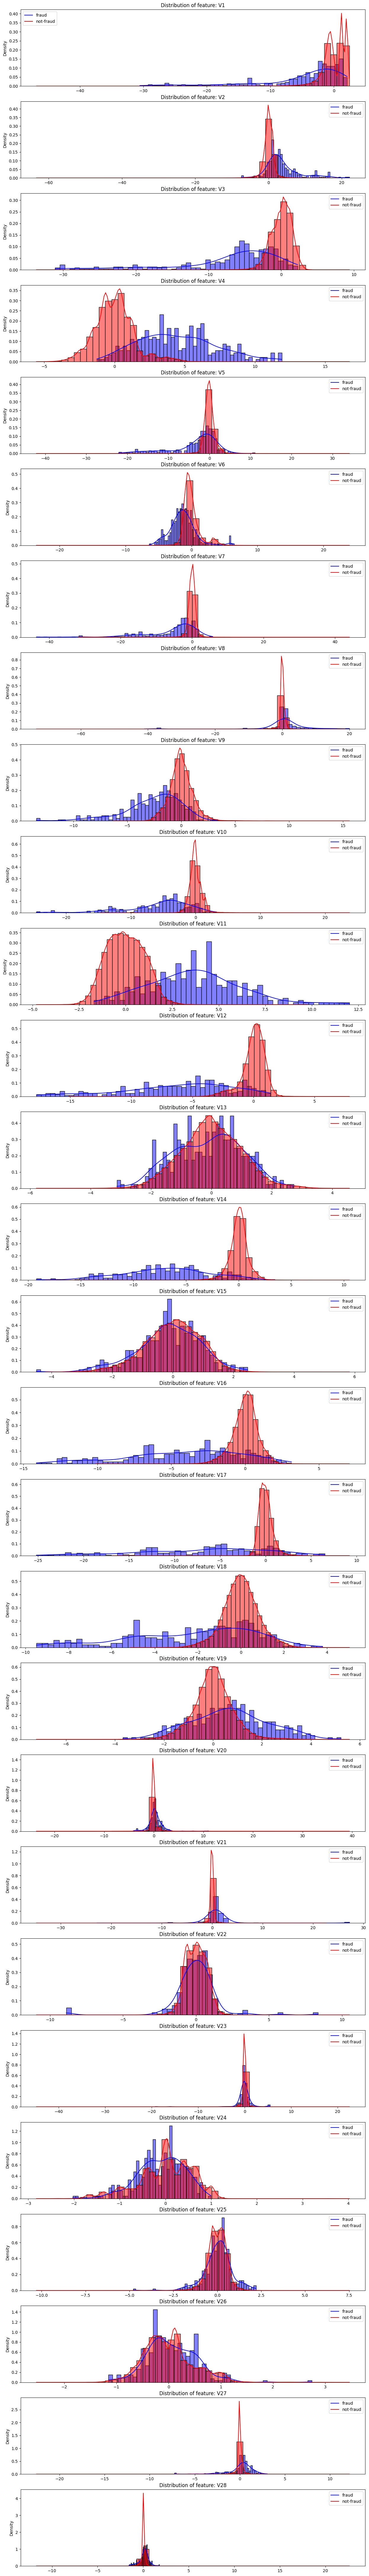

In [17]:
import matplotlib.gridspec as gridspec
features=[f for f in df.columns if not 'Class' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    print(feat)
    ax = plt.subplot(gs[i])
    sns.histplot(X_train[feat][y_train==1], stat="density", kde=True, color="blue", bins=50)
    sns.histplot(X_train[feat][y_train==0], stat="density", kde=True, color="red", bins=50)
    ax.legend(['fraud', 'not-fraud'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. **[0.5]**

**These graphs compare the distribution of data points to the expected Gaussian distribution. The far the mean of the 2 distribution to each other, the better this feature is meaningful to distinguish fraud and none-fraud data. The points that don't follow by the expected Gaussian distribution are considered  outliers. Also, we can use these graphs to select the threshold. **

## **Part 2: Single feature model with one Gaussian distribution: [2.5 Marks]**
We'll start by making a prediction using **a single feature of our dataset at a time**.

Please note that we **only use `V` features** in our model.

**a. Fitting regardless of class:**
  1. Fit a single Gaussian distribution on a single feature of **the full training dataset** (both classes) using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``.
  2. Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on both the full training set and validation set (including both classes).  
  3. Repeat the above steps for each of the features and present your findings in a table.
  4. Find the best 3 features to distinguish fraud transactions from not-fraud transactions based on the AUC of the validation set. **[0.2]**
  5. Make a prediction based on a model's scores: If the `score_samples` is lower than a threshold, we consider that transaction as a fraud. Find an optimal threshold that maximizes the F1 Score of the validation set for each of those 3 features separately. (Do not check every possible value for threshold, come up with a faster way!) Compute F1 score using `sklearn.metrics.f1_score`. **[0.5]**
  6. Report the complexity of your method (Big O notation) for determining the optimal threshold.**[0.5]**

**b. Fitting based on class:**
 1. Pick 3 features that had the best AUC in Part 2a.
 2. Compute AUC and F1 score when you fit a Gaussian **only on not-fraud transactions** (instead of all the transactions).
 3. Compare your results from parts 2a and 2b (AUC and F1 score) in a table. **[0.8]**
 4. Are these results different or similar? Why?**[0.5]**





In [29]:
### YOUR CODE HERE ###
from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score


model = GaussianMixture(n_components = 1,covariance_type = 'full', random_state = 0)
X_trainval = pd.concat([X_train, X_val], ignore_index = True)
y_trainval = pd.concat([y_train, y_val], ignore_index = True)
auc_list = []
features = ['V'+str(i+1) for i in range(28)]
for i in range(28):
    train = X_train.iloc[ : , i].values.reshape(-1, 1)
    model.fit(train)
    train_val = X_val.iloc[ : , i].values.reshape(-1, 1)

    model_score = model.score_samples(train_val)
    fp, tp, thresholds = roc_curve(y_val, 1 - model_score)
    auc_score = auc(fp, tp)
    auc_list.append(auc_score)
auc_data = pd.DataFrame(data={'feature':features, 'auc':auc_list})
print(auc_data)

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7d7117f2f520>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 847, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 984, in _make_controller_from_path
    lib_controller = controller_class(filepath=filepath, prefix=prefix)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 111, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-742d56dc.3.20.so: cannot open shared object file: No such file or directory


   feature       auc
0       V1  0.694811
1       V2  0.837800
2       V3  0.838364
3       V4  0.888283
4       V5  0.786857
5       V6  0.673559
6       V7  0.867423
7       V8  0.774130
8       V9  0.776739
9      V10  0.905959
10     V11  0.882058
11     V12  0.837909
12     V13  0.561798
13     V14  0.938073
14     V15  0.509647
15     V16  0.882852
16     V17  0.881858
17     V18  0.785790
18     V19  0.770560
19     V20  0.686071
20     V21  0.764318
21     V22  0.493503
22     V23  0.660997
23     V24  0.497913
24     V25  0.521330
25     V26  0.516492
26     V27  0.766315
27     V28  0.794233


In [30]:
# top 3 auc
top_3_scores = auc_data.nlargest(3, 'auc')

print(top_3_scores)

   feature       auc
13     V14  0.938073
9      V10  0.905959
3       V4  0.888283


Q4: The best three features are V14, V10, V4

In [31]:
# Part A
from sklearn.metrics import f1_score
import seaborn as sns

def score_sample(model, train, val):
  model.fit(train)
  return model.score_samples(val)

def get_rough_score(X, y_val, score):
  lst = []
  # print(len(X))
  for i in range(100, len(X), 100):
    score_sorted = sorted(score)[i]
    pred = []

    for j in range(len(y_val)):
      if score[j] < score_sorted:
        pred.append(1)
      else:
        pred.append(0)
    lst.append(f1_score(y_val, pred))
  return lst

def get_precise_score(X, y, score, F1_rough_score):
  lst = []
  rough_list = range(100, len(X), 100)
  F1_score_rough_max = F1_rough_score[np.argmax(F1_rough_score)]
  idx = rough_list[np.argmax(F1_rough_score)]
  for i in range(idx-100, idx+100):
    score_sorted = sorted(score)[i]
    pred = []

    for j in range(len(y_val)):
      if score[j] < score_sorted:
        pred.append(1)
      else:
        pred.append(0)
    lst.append(f1_score(y_val, pred))
  return lst

def plot_scores(score, center, rough_score, precise_score, rough_lst, rough_max, precise_max):

  F1_data_rough = {'i': rough_lst, 'F1_score': rough_score}
  F1_plot1_rough = pd.DataFrame(F1_data_rough)
  sns.lineplot(data = F1_plot1_rough, x = 'i', y='F1_score')
  precise_list = range(int(center - 100), int(center + 100))
  F1_score_precise_index = np.argmax(precise_score)
  F1_score_precise_max = precise_score[F1_score_precise_index]
  precise_counter = precise_list[F1_score_precise_index]

  print('Rough: {}'.format({sorted(score)[center]}))
  print('F1 score: {}'.format(rough_max))
  print('Precise: {}'.format({sorted(score)[precise_counter]}))
  print('F1 score: {}'.format(F1_score_precise_max))
  F1_data_precise = {'i': precise_list, 'F1_score': precise_max}
  F1_plot1_precise = pd.DataFrame(F1_data_precise)
  sns.lineplot(data = F1_plot1_precise, x = 'i', y='F1_score')

  return sorted(score)[precise_counter], F1_score_precise_max

def main(feature_idx):
  print('threshold V' + str(feature_idx+1) + ':\n')

  V_train = X_train.iloc[:, feature_idx].values.reshape(-1,1)
  V_val = X_val.iloc[:, feature_idx].values.reshape(-1,1)


  score = score_sample(model, V_train, V_val)

  F1_scores_rough = get_rough_score(V_val, y_val, score)

  rough_list = range(100, len(V_val), 100)
  F1_score_rough_max = F1_scores_rough[np.argmax(F1_scores_rough)]
  rough_counter = rough_list[np.argmax(F1_scores_rough)]

  F1_scores_precise = get_precise_score(V_val, y_val, score, F1_scores_rough)
  return plot_scores(score, rough_counter, F1_scores_rough, F1_scores_precise, rough_list, F1_score_rough_max, F1_scores_precise)


threshold V10:

Rough: {-24.47968605949827}
F1 score: 0.15568862275449102
Precise: {-57.92586901470648}
F1 score: 0.2558139534883721


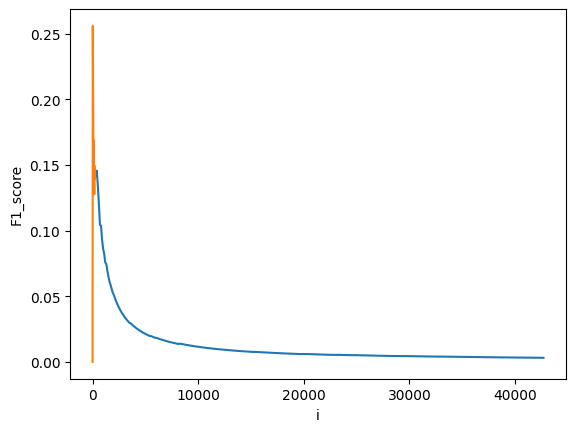

In [32]:
threshold9, score9 = main(9)

threshold V14:

Rough: {-12.902158623138712}
F1 score: 0.502994011976048
Precise: {-19.3121134731105}
F1 score: 0.5901639344262295


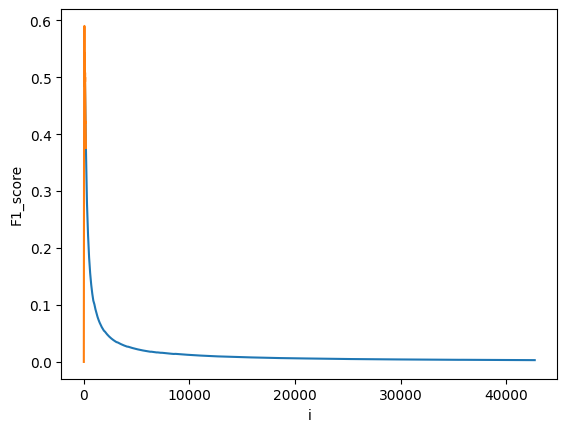

In [33]:
threshold13, score13 = main(13)

threshold V4:

Rough: {-7.568655823754442}
F1 score: 0.29940119760479045
Precise: {-11.02768078996792}
F1 score: 0.3619047619047619


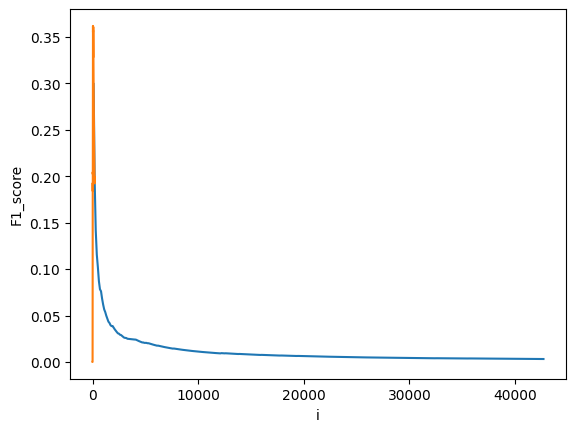

In [34]:
threshold3, score3 = main(3)

Q5: The maximum F1 Score of V14 is 0.590, the optimal threshold is -19.3.

The maximum F1 score of V4 is 0.362, the optimal threshold is -11.0.

The maximum F1 score of V10 is 0.256, the optimal threshold is -57.9.

Q6: The complexity is O(n^2)

In [35]:
# Part B:
X_non_fraud_train = X_train.copy()
y_non_fraud_train = y_train
X_non_fraud_train['Class'] = y_non_fraud_train
X_non_fraud_train = X_non_fraud_train[X_non_fraud_train.iloc[:, -1] == 0]
y_non_fraud_train = X_non_fraud_train['Class']
X_non_fraud_train = X_non_fraud_train.drop(['Class'], axis = 1)
X_non_fraud_val = X_val
y_non_fraud_val = y_val[y_val == 0]
X_non_fraud_val['Class'] = y_non_fraud_val
X_non_fraud_val = X_non_fraud_val[X_non_fraud_val.iloc[:, -1] == 0]
X_non_fraud_val = X_non_fraud_val.drop(['Class'], axis = 1)
X_non_fraud_trainval = pd.concat([X_non_fraud_train, X_non_fraud_val], ignore_index = True)
y_non_fraud_trainval = pd.concat([y_train, y_non_fraud_val], ignore_index = True)

In [36]:
model = GaussianMixture(n_components = 1, covariance_type = 'full', random_state = 0)
auc_fbc = []
y_trainval = pd.concat([y_train, y_val], ignore_index = True)
for i in range(28):
  feature_nonfaud_train = X_non_fraud_train.iloc[ : , i].values.reshape(-1, 1)
  model.fit(feature_nonfaud_train)
  feature_trainval = X_val.iloc[ : , i].values.reshape(-1, 1)
  score = model.score_samples(feature_trainval)
  fp, tp, thresholds = roc_curve(y_val, 1 - score)
  auc_ = auc(fp, tp)
  auc_fbc.append(auc_)

# AUC table
auc_data_fbc = {'feature': features, 'auc non fraud': auc_fbc}
auc_table_fbc = pd.DataFrame(data = auc_data_fbc)

auc_table_fbc

,feature,auc non fraud
0,V1,0.694766
1,V2,0.837981
2,V3,0.839306
3,V4,0.888803
4,V5,0.786740
5,V6,0.673702
6,V7,0.867579
7,V8,0.774183
8,V9,0.777161
9,V10,0.905900


In [37]:
top_3_scores_non = auc_table_fbc.nlargest(3, 'auc non fraud')

print(top_3_scores_non)

   feature  auc non fraud
13     V14       0.938072
9      V10       0.905900
3       V4       0.888803


The AUC of V14 is 0.938, V10 is 0.906, V4 is 0.889.

In [38]:
def main_non_fraud(feature_idx):
  print('threshold V' + str(feature_idx+1) + ':\n')

  # Find a rough best threshold without traversing every threshold
  V_train = X_non_fraud_train.iloc[:, feature_idx].values.reshape(-1,1)
  V_val = X_val.iloc[:, feature_idx].values.reshape(-1,1)


  score = score_sample(model, V_train, V_val)

  F1_scores_rough = get_rough_score(V_val, y_val, score)

  rough_list = range(100, len(V_val), 100)
  F1_score_rough_max = F1_scores_rough[np.argmax(F1_scores_rough)]
  rough_counter = rough_list[np.argmax(F1_scores_rough)]

  F1_scores_precise = get_precise_score(V_val, y_val, score, F1_scores_rough)
  return plot_scores(score, rough_counter, F1_scores_rough, F1_scores_precise, rough_list, F1_score_rough_max, F1_scores_precise)

threshold V10:

Rough: {-26.396211415533788}
F1 score: 0.15568862275449102
Precise: {-63.455720335196865}
F1 score: 0.25882352941176473


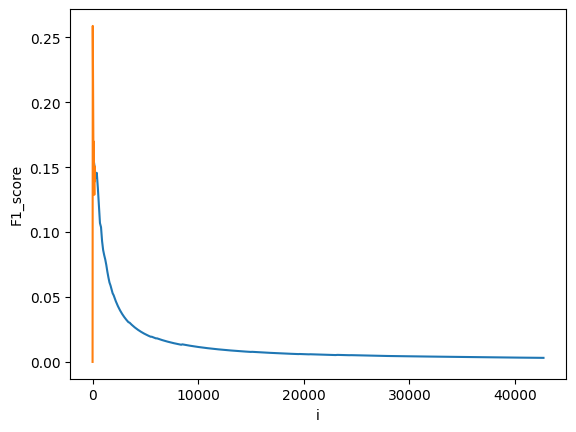

In [39]:
threshold9_non, score9_non = main_non_fraud(9)

threshold V14:

Rough: {-14.537618838763938}
F1 score: 0.502994011976048
Precise: {-21.83439783902771}
F1 score: 0.5901639344262295


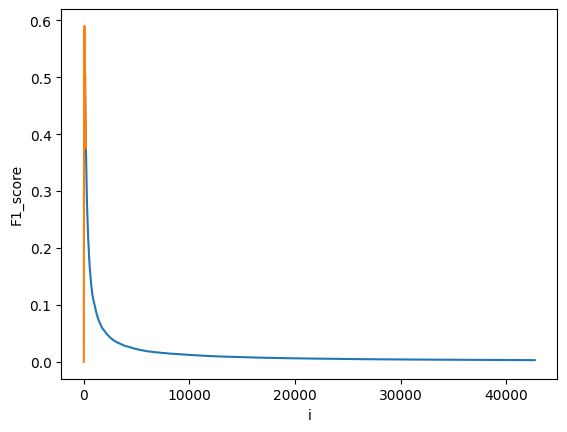

In [ ]:
threshold13_non, score13_non = main_non_fraud(13)

threshold V4:

Rough: {-7.720794251275739}
F1 score: 0.29940119760479045
Precise: {-11.263440674919563}
F1 score: 0.3619047619047619


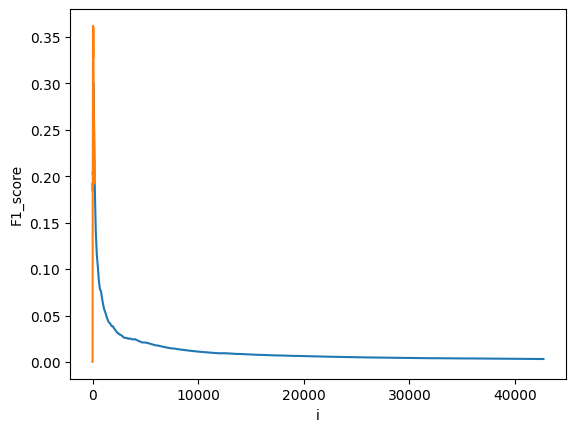

In [ ]:
threshold3_non, score3_non = main_non_fraud(3)

In [ ]:
thresholds_non_fraud = [threshold9_non, threshold13_non, threshold3_non]
thresholds = [threshold9, threshold13, threshold3]
scores_non_fraud = [score9_non, score13_non, score3_non]
scores = [score9, score13, score3]

auc_fbc_top3_table_ = top_3_scores.drop(['feature'], axis = 1)

auc_table_frc_fbc = pd.concat([top_3_scores, top_3_scores_non], axis = 1)

f1_frc_fbc_data = {'threshold':thresholds,'threshold non fraud':thresholds_non_fraud,'F1 ':scores,'F1 non fraud':scores_non_fraud}
f1_frc_fbc_table = pd.DataFrame(data = f1_frc_fbc_data, index = [9,13,3])
table_frc_fbc = pd.concat([auc_table_frc_fbc, f1_frc_fbc_table], axis = 1)
table_frc_fbc


,feature,auc,feature,auc non fraud,threshold,threshold non fraud,F1,F1 non fraud
13,V14,0.938073,V14,0.938072,-6.804685,-21.834398,0.491803,0.590164
9,V10,0.905959,V10,0.905900,-57.925869,-63.455720,0.255814,0.258824
3,V4,0.888283,V4,0.888803,-11.027681,-11.263441,0.361905,0.361905


The results from 2a and 2b are similar in the full dataset and non-fraud dataset since the threshold and F1 scores are close. This might because the data is highly unbalanced, since non-fraud data took over 99% of the total data, the fraud data does too little impact to the final result. The majority class, that is the non-fraud data highly affected the result, which caused the result is similar to the full dataset.

## **Part 3: Multiple feature model with one Gaussian distribution: [1 Marks]**
This part is similar to Part 2, but we will pick multiple features and **visually** set the number of components.

  a. 2D plot:
 1. Pick two features (say, f1 and f2).
 2. Scatter plot (plt.scatter) those features on a figure (f1 on the x-axis and f2 on the y-axis).
 3. Color the data points based on their class (not-fraud blue and fraud red).
 4. Based on your plots, decide how many Gaussian components (``n_components``) you need to fit the data (focus on valid transactions). Explain.  **[0.25]**
 5. Fit your Gaussian model on all the data points.
 6. Compute AUC on both training and validation sets
 7. Pick 3 new pairs of features and repeat steps 2 to 6. **[0.25]**
 8. For each pair, find a threshold to maximize your validation set F1 Score.**[0.25]**
 9. For each pair, plot a figure similar to step 3 and put a circle around outliers based on your threshold (use the code of the similar figure in the tutorial) **[0.25]**





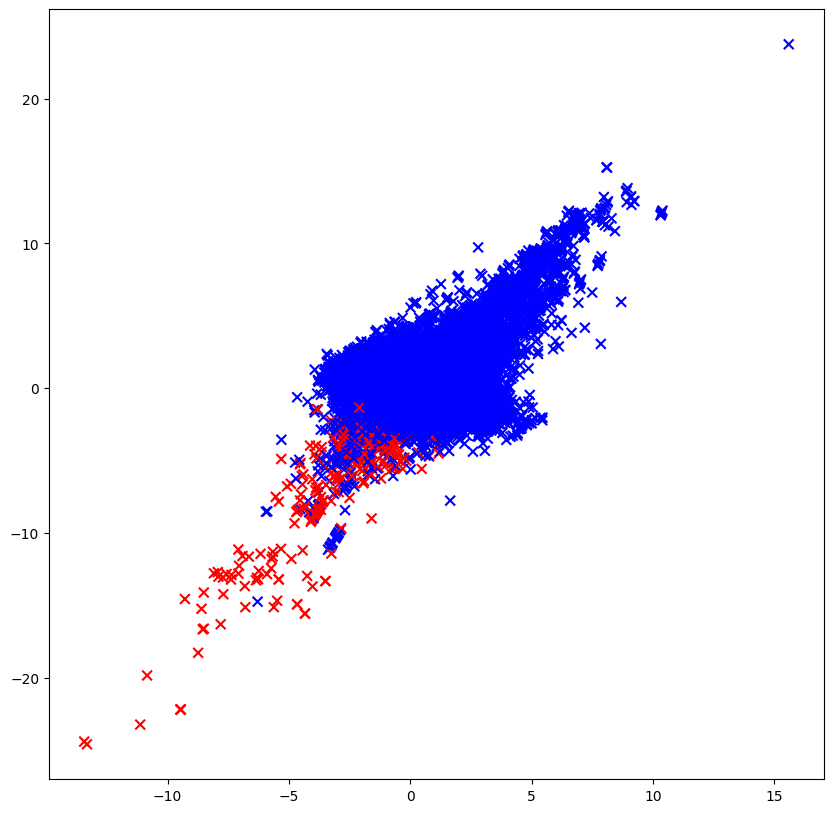

In [26]:
### YOUR CODE HERE ###
# Select relevant features from the training and validation sets
features_train = X_train[['V9', 'V10']]
features_val = X_val[['V9', 'V10']]

# Concatenate the training and validation features
all_features = pd.concat([features_train, features_val], ignore_index=True)

# Define colors for plotting (0: blue, 1: red)
color_mapping = {0: 'blue', 1: 'red'}

# Create a scatter plot of the selected features with colors based on labels
plt.figure(figsize=(10, 10))
plt.scatter(features_train['V9'], features_train['V10'], marker='x', c=y_train.map(color_mapping), s=50)
plt.show()

Q4: **I choose 2 Gaussian components. Because I tried the number of Gaussian components from 1 to 4, and it gives me the maximum validation of f1 when n_component=2.**

In [27]:
# Initialize the Gaussian Mixture model
model = GaussianMixture(n_components=2, covariance_type='full', random_state=0)

# List to store AUC values
auc_list = []

# Features of interest
features = ['V9', 'V10']

for feature_name in features:
    # Fit the model on the training set
    feature_train = features_train[feature_name].values.reshape(-1, 1)
    model.fit(feature_train)

    # Compute AUC on the combined train and validation set
    feature_trainval = all_features[feature_name].values.reshape(-1, 1)
    score = model.score_samples(feature_trainval)
    fpr, tpr, threshold = roc_curve(y_trainval, 1 - score)
    auc_value = auc(fpr, tpr)
    auc_list.append(auc_value)

# Create a DataFrame to display AUC values
auc_data = {'feature': features, 'AUC (V9 V10)': auc_list}
auc_table = pd.DataFrame(data=auc_data)
auc_table

,feature,AUC (V9 V10)
0,V9,0.793004
1,V10,0.914374


Rough: {-9.880742286600398}
F1 score: 0.19161676646706588
Precise: {-12.715772665544499}
F1 score: 0.2696629213483146


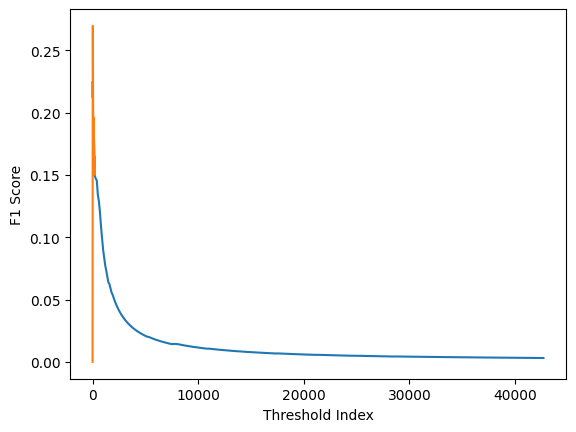

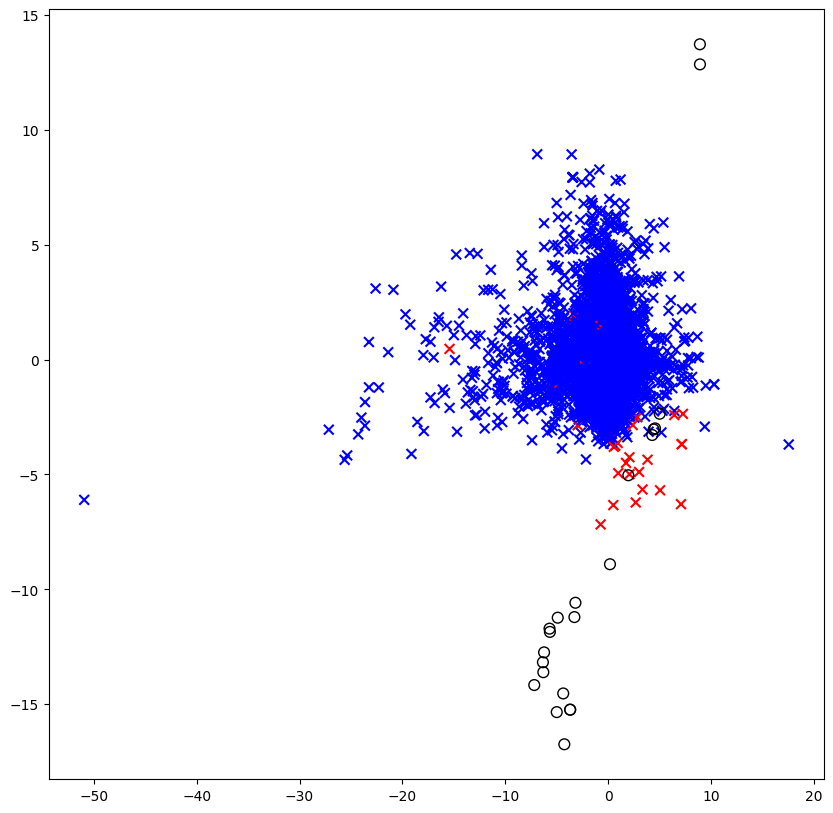

In [28]:
from scipy.special import modfresnelm
from sklearn.mixture import GaussianMixture
from sklearn.metrics import f1_score

# Initialize the Gaussian Mixture model
model = GaussianMixture(n_components=2, covariance_type='full', random_state=0)

# Fit the model on the training features
model.fit(features_train)

score = model.score_samples(features_val)

# Find a rough best threshold without traversing every threshold
f1_scores_rough = []
step_len_rough = 100

for threshold_index in range(step_len_rough, len(features_val), step_len_rough):
    threshold = sorted(score)[threshold_index]
    predicted_labels = [1 if score < threshold else 0 for score in score]
    f1 = f1_score(y_val, predicted_labels)
    f1_scores_rough.append(f1)

rough_thresholds = range(step_len_rough, len(features_val), step_len_rough)
max_f1_index_rough = np.argmax(f1_scores_rough)
max_f1_rough = f1_scores_rough[max_f1_index_rough]
rough_threshold = rough_thresholds[max_f1_index_rough]

# Create a DataFrame for F1 scores during the rough threshold search
f1_data_rough = {'Threshold Index': rough_thresholds, 'F1 Score': f1_scores_rough}
f1_plot_rough = pd.DataFrame(data=f1_data_rough)
sns.lineplot(data=f1_plot_rough, x='Threshold Index', y='F1 Score')

# Search for the precise threshold in a smaller range around the rough threshold
f1_scores_precise = []
range_len_precise = step_len_rough

for threshold_index in range(int(rough_threshold - range_len_precise), int(rough_threshold + range_len_precise)):
    threshold = sorted(score)[threshold_index]
    predicted_labels = [1 if score < threshold else 0 for score in score]
    f1 = f1_score(y_val, predicted_labels)
    f1_scores_precise.append(f1)

precise_thresholds = range(int(rough_threshold - range_len_precise), int(rough_threshold + range_len_precise))
max_f1_index_precise = np.argmax(f1_scores_precise)
max_f1_precise = f1_scores_precise[max_f1_index_precise]
precise_threshold = precise_thresholds[max_f1_index_precise]

print('Rough: {}'.format({sorted(score)[rough_threshold]}))
print('F1 score: {}'.format(max_f1_rough))
print('Precise: {}'.format({sorted(score)[precise_threshold]}))
print('F1 score: {}'.format(max_f1_precise))

# Create a DataFrame for F1 scores during the precise threshold search
f1_data_precise = {'Threshold Index': precise_thresholds, 'F1 Score': f1_scores_precise}
f1_plot_precise = pd.DataFrame(data=f1_data_precise)
sns.lineplot(data=f1_plot_precise, x='Threshold Index', y='F1 Score')

# Plot outliers with circles
plt.figure(figsize=(10, 10))
plt.scatter(X_val['V8'], X_val['V9'], marker='x', c=y_val.map({0: 'blue', 1: 'red'}), s=50)
outliers = np.nonzero(score < sorted(score)[precise_threshold])[0]
plt.scatter(features_val.values[outliers, 0], features_val.values[outliers, 1], marker='o', facecolor='none', edgecolor='black', s=60)
plt.show()


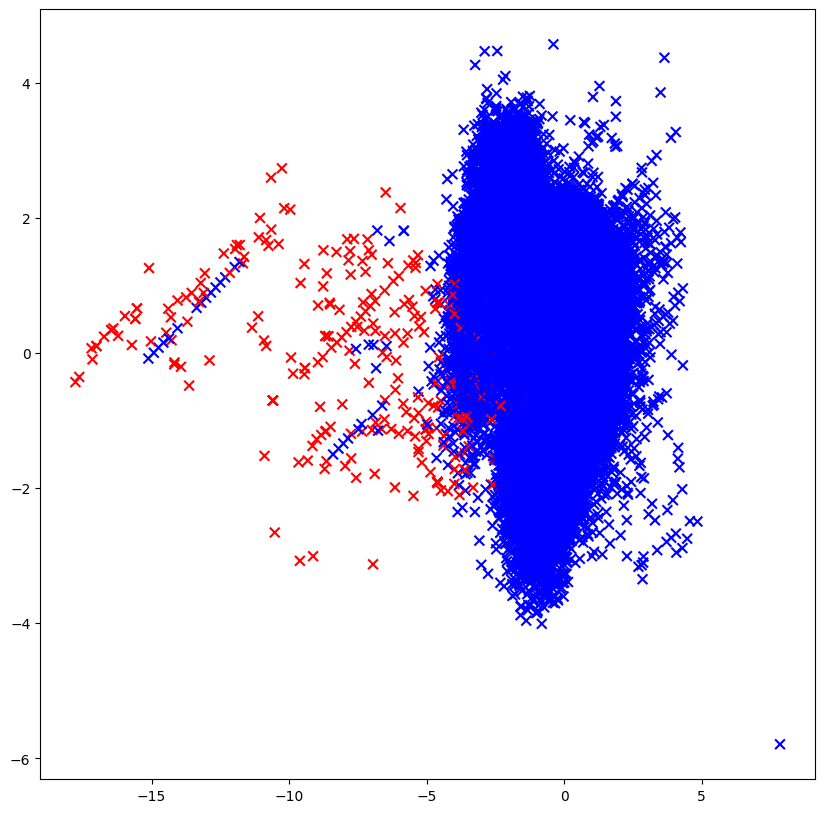

In [ ]:
### YOUR CODE HERE ###
# Select relevant features from the training and validation sets
features_train = X_train[['V12', 'V13']]
features_val = X_val[['V12', 'V13']]

# Concatenate the training and validation features
all_features = pd.concat([features_train, features_val], ignore_index=True)

# Define colors for plotting (0: blue, 1: red)
color_mapping = {0: 'blue', 1: 'red'}

# Create a scatter plot of the selected features with colors based on labels
plt.figure(figsize=(10, 10))
plt.scatter(features_train['V12'], features_train['V13'], marker='x', c=y_train.map(color_mapping), s=50)
plt.show()

In [ ]:
# Initialize the Gaussian Mixture model
model = GaussianMixture(n_components=2, covariance_type='full', random_state=0)

# List to store AUC values
auc_list = []

# Features of interest
features = ['V12', 'V13']

for feature_name in features:
    # Fit the model on the training set
    feature_train = features_train[feature_name].values.reshape(-1, 1)
    model.fit(feature_train)

    # Compute AUC on the combined train and validation set
    feature_trainval = all_features[feature_name].values.reshape(-1, 1)
    score = model.score_samples(feature_trainval)
    fpr, tpr, threshold = roc_curve(y_trainval, 1 - score)
    auc_value = auc(fpr, tpr)
    auc_list.append(auc_value)

# Create a DataFrame to display AUC values
auc_data = {'feature': features, 'AUC (V12 V13)': auc_list}
auc_table = pd.DataFrame(data=auc_data)
auc_table

,feature,AUC (V12 V13)
0,V12,0.919071
1,V13,0.572995


Rough: {-8.40738824701496}
F1 score: 0.4311377245508982
Precise: {-10.199656520777358}
F1 score: 0.5094339622641508


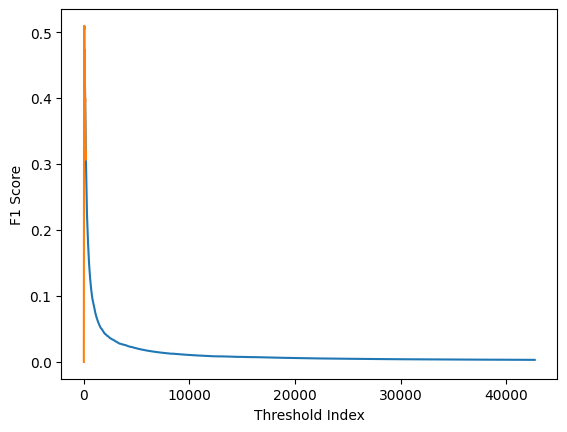

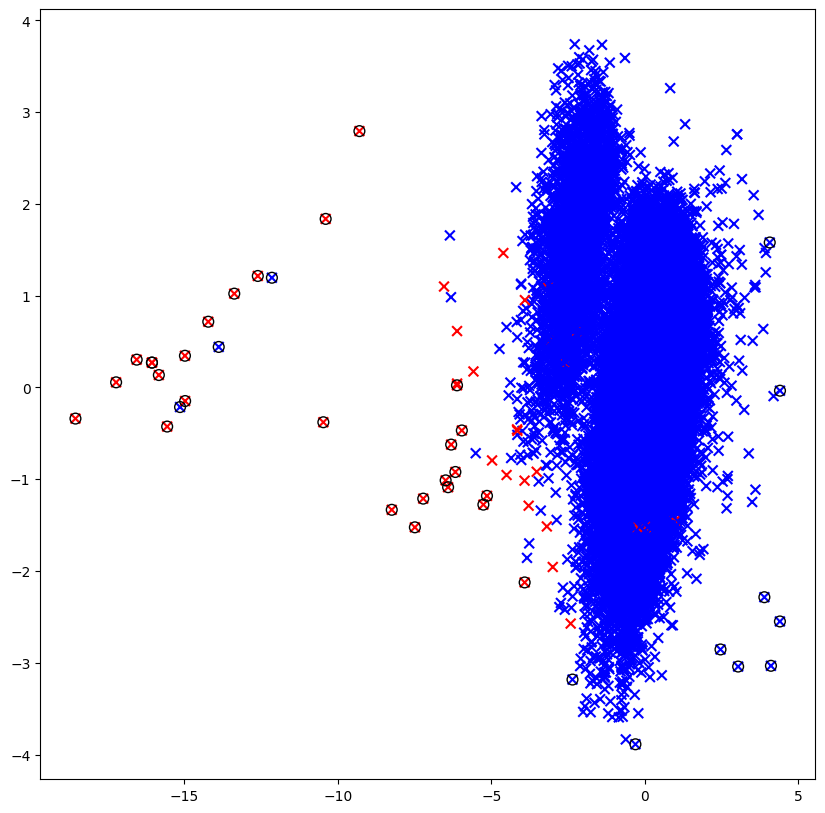

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import f1_score

# Initialize the Gaussian Mixture model
model = GaussianMixture(n_components=2, covariance_type='full', random_state=0)

# Fit the model on the training features
model.fit(features_train)

score = model.score_samples(features_val)

# Find a rough best threshold without traversing every threshold
f1_scores_rough = []
step_len_rough = 100

for threshold_index in range(step_len_rough, len(features_val), step_len_rough):
    threshold = sorted(score)[threshold_index]
    predicted_labels = [1 if score < threshold else 0 for score in score]
    f1 = f1_score(y_val, predicted_labels)
    f1_scores_rough.append(f1)

rough_thresholds = range(step_len_rough, len(features_val), step_len_rough)
max_f1_index_rough = np.argmax(f1_scores_rough)
max_f1_rough = f1_scores_rough[max_f1_index_rough]
rough_threshold = rough_thresholds[max_f1_index_rough]

print('Rough: {}'.format({sorted(score)[rough_threshold]}))
print('F1 score: {}'.format(max_f1_rough))

# Create a DataFrame for F1 scores during the rough threshold search
f1_data_rough = {'Threshold Index': rough_thresholds, 'F1 Score': f1_scores_rough}
f1_plot_rough = pd.DataFrame(data=f1_data_rough)
sns.lineplot(data=f1_plot_rough, x='Threshold Index', y='F1 Score')

# Search for the precise threshold in a smaller range around the rough threshold
f1_scores_precise = []
range_len_precise = step_len_rough

for threshold_index in range(int(rough_threshold - range_len_precise), int(rough_threshold + range_len_precise)):
    threshold = sorted(score)[threshold_index]
    predicted_labels = [1 if score < threshold else 0 for score in score]
    f1 = f1_score(y_val, predicted_labels)
    f1_scores_precise.append(f1)

precise_thresholds = range(int(rough_threshold - range_len_precise), int(rough_threshold + range_len_precise))
max_f1_index_precise = np.argmax(f1_scores_precise)
max_f1_precise = f1_scores_precise[max_f1_index_precise]
precise_threshold = precise_thresholds[max_f1_index_precise]

print('Precise: {}'.format({sorted(score)[precise_threshold]}))
print('F1 score: {}'.format(max_f1_precise))

# Create a DataFrame for F1 scores during the precise threshold search
f1_data_precise = {'Threshold Index': precise_thresholds, 'F1 Score': f1_scores_precise}
f1_plot_precise = pd.DataFrame(data=f1_data_precise)
sns.lineplot(data=f1_plot_precise, x='Threshold Index', y='F1 Score')

# Plot outliers with circles
plt.figure(figsize=(10, 10))
plt.scatter(X_val['V12'], X_val['V13'], marker='x', c=y_val.map({0: 'blue', 1: 'red'}), s=50)
outliers = np.nonzero(score < sorted(score)[precise_threshold])[0]
plt.scatter(features_val.values[outliers, 0], features_val.values[outliers, 1], marker='o', facecolor='none', edgecolor='black', s=60)
plt.show()


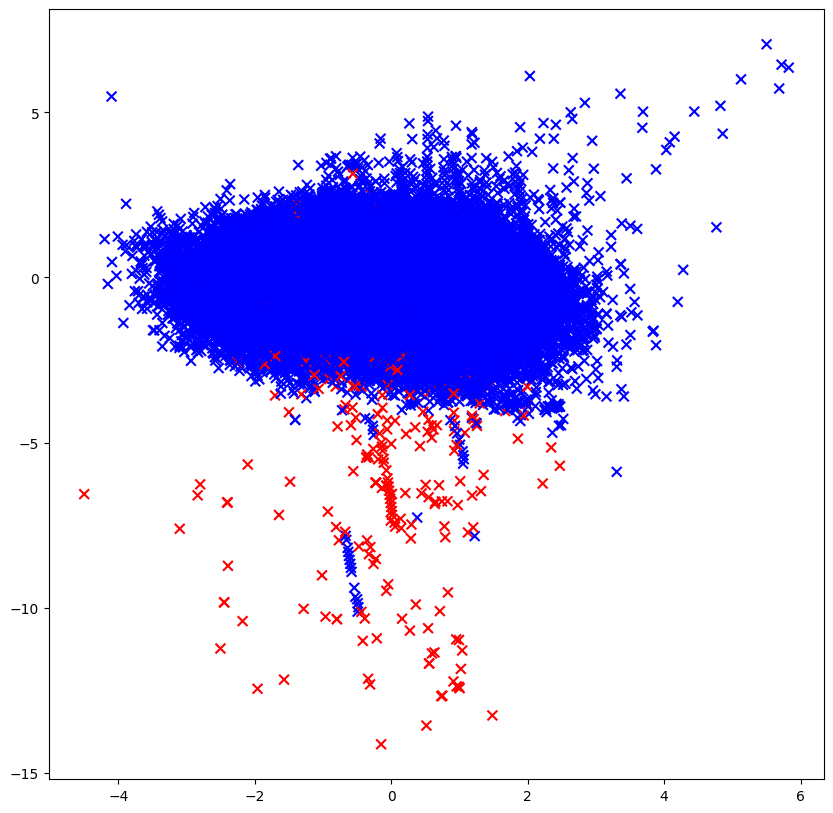

In [ ]:
### YOUR CODE HERE ###
# Select relevant features from the training and validation sets
features_train = X_train[['V15', 'V16']]
features_val = X_val[['V15', 'V16']]

# Concatenate the training and validation features
all_features = pd.concat([features_train, features_val], ignore_index=True)

# Define colors for plotting (0: blue, 1: red)
color_mapping = {0: 'blue', 1: 'red'}

# Create a scatter plot of the selected features with colors based on labels
plt.figure(figsize=(10, 10))
plt.scatter(features_train['V15'], features_train['V16'], marker='x', c=y_train.map(color_mapping), s=50)
plt.show()

In [ ]:
# Initialize the Gaussian Mixture model
model = GaussianMixture(n_components=2, covariance_type='full', random_state=0)

# List to store AUC values
auc_list = []

# Features of interest
features = ['V15', 'V16']

for feature_name in features:
    # Fit the model on the training set
    feature_train = features_train[feature_name].values.reshape(-1, 1)
    model.fit(feature_train)

    # Compute AUC on the combined train and validation set
    feature_trainval = all_features[feature_name].values.reshape(-1, 1)
    score = model.score_samples(feature_trainval)
    fpr, tpr, threshold = roc_curve(y_trainval, 1 - score)
    auc_value = auc(fpr, tpr)
    auc_list.append(auc_value)

# Create a DataFrame to display AUC values
auc_data = {'feature': features, 'AUC (V15 V16)': auc_list}
auc_table = pd.DataFrame(data=auc_data)
auc_table

,feature,AUC (V15 V16)
0,V15,0.526192
1,V16,0.895667


Rough: {-8.099969406646354}
F1 score: 0.34730538922155685
Precise: {-11.269434346743378}
F1 score: 0.46017699115044247


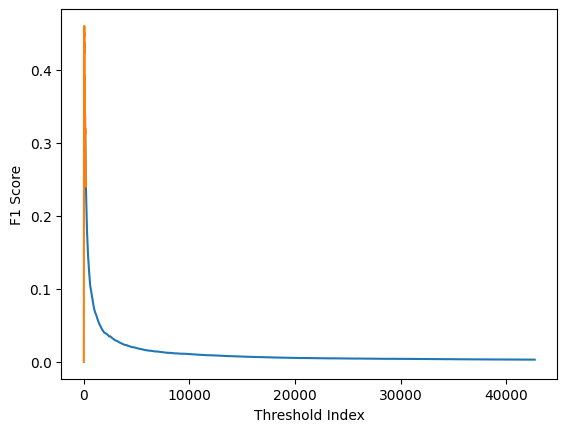

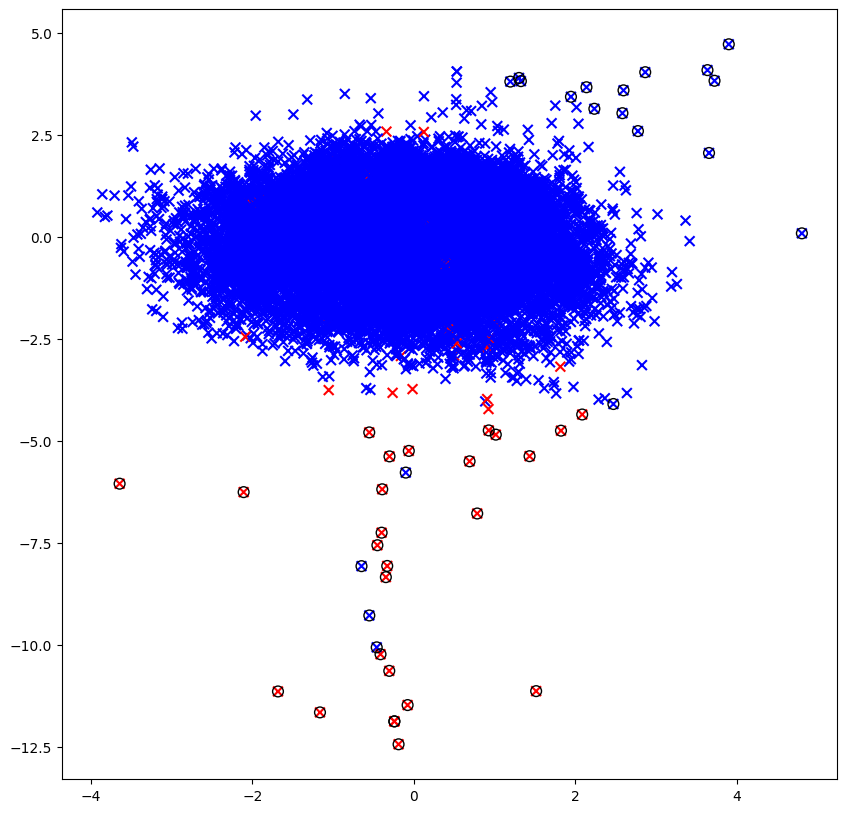

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import f1_score

# Initialize the Gaussian Mixture model
model = GaussianMixture(n_components=2, covariance_type='full', random_state=0)

# Fit the model on the training features
model.fit(features_train)

score = model.score_samples(features_val)

# Find a rough best threshold without traversing every threshold
f1_scores_rough = []
step_len_rough = 100

for threshold_index in range(step_len_rough, len(features_val), step_len_rough):
    threshold = sorted(score)[threshold_index]
    predicted_labels = [1 if score < threshold else 0 for score in score]
    f1 = f1_score(y_val, predicted_labels)
    f1_scores_rough.append(f1)

rough_thresholds = range(step_len_rough, len(features_val), step_len_rough)
max_f1_index_rough = np.argmax(f1_scores_rough)
max_f1_rough = f1_scores_rough[max_f1_index_rough]
rough_threshold = rough_thresholds[max_f1_index_rough]


# Create a DataFrame for F1 scores during the rough threshold search
f1_data_rough = {'Threshold Index': rough_thresholds, 'F1 Score': f1_scores_rough}
f1_plot_rough = pd.DataFrame(data=f1_data_rough)
sns.lineplot(data=f1_plot_rough, x='Threshold Index', y='F1 Score')

# Search for the precise threshold in a smaller range around the rough threshold
f1_scores_precise = []
range_len_precise = step_len_rough

for threshold_index in range(int(rough_threshold - range_len_precise), int(rough_threshold + range_len_precise)):
    threshold = sorted(score)[threshold_index]
    predicted_labels = [1 if score < threshold else 0 for score in score]
    f1 = f1_score(y_val, predicted_labels)
    f1_scores_precise.append(f1)

precise_thresholds = range(int(rough_threshold - range_len_precise), int(rough_threshold + range_len_precise))
max_f1_index_precise = np.argmax(f1_scores_precise)
max_f1_precise = f1_scores_precise[max_f1_index_precise]
precise_threshold = precise_thresholds[max_f1_index_precise]

print('Rough: {}'.format({sorted(score)[rough_threshold]}))
print('F1 score: {}'.format(max_f1_rough))
print('Precise: {}'.format({sorted(score)[precise_threshold]}))
print('F1 score: {}'.format(max_f1_precise))

# Create a DataFrame for F1 scores during the precise threshold search
f1_data_precise = {'Threshold Index': precise_thresholds, 'F1 Score': f1_scores_precise}
f1_plot_precise = pd.DataFrame(data=f1_data_precise)
sns.lineplot(data=f1_plot_precise, x='Threshold Index', y='F1 Score')

# Plot outliers with circles
plt.figure(figsize=(10, 10))
plt.scatter(X_val['V15'], X_val['V16'], marker='x', c=y_val.map({0: 'blue', 1: 'red'}), s=50)
outliers = np.nonzero(score < sorted(score)[precise_threshold])[0]
plt.scatter(features_val.values[outliers, 0], features_val.values[outliers, 1], marker='o', facecolor='none', edgecolor='black', s=60)
plt.show()


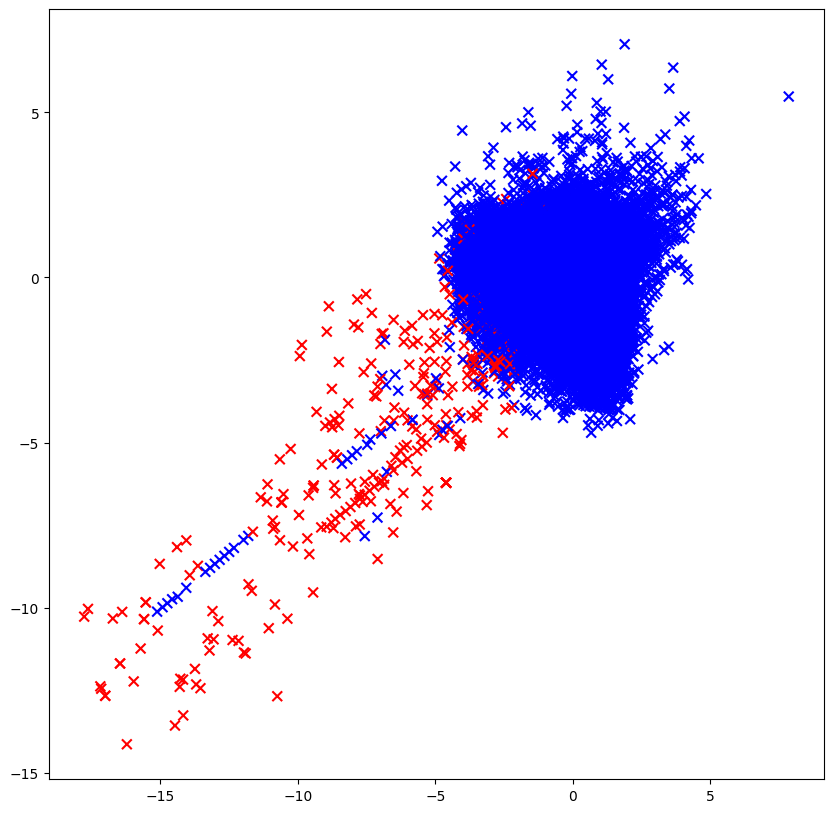

In [ ]:
### YOUR CODE HERE ###
# Select relevant features from the training and validation sets
features_train = X_train[['V12', 'V16']]
features_val = X_val[['V12', 'V16']]

# Concatenate the training and validation features
all_features = pd.concat([features_train, features_val], ignore_index=True)

# Define colors for plotting (0: blue, 1: red)
color_mapping = {0: 'blue', 1: 'red'}

# Create a scatter plot of the selected features with colors based on labels
plt.figure(figsize=(10, 10))
plt.scatter(features_train['V12'], features_train['V16'], marker='x', c=y_train.map(color_mapping), s=50)
plt.show()

In [ ]:
# Initialize the Gaussian Mixture model
model = GaussianMixture(n_components=2, covariance_type='full', random_state=0)

# List to store AUC values
auc_list = []

# Features of interest
features = ['V12', 'V16']

for feature_name in features:
    # Fit the model on the training set
    feature_train = features_train[feature_name].values.reshape(-1, 1)
    model.fit(feature_train)

    # Compute AUC on the combined train and validation set
    feature_trainval = all_features[feature_name].values.reshape(-1, 1)
    score = model.score_samples(feature_trainval)
    fpr, tpr, threshold = roc_curve(y_trainval, 1 - score)
    auc_value = auc(fpr, tpr)
    auc_list.append(auc_value)

# Create a DataFrame to display AUC values
auc_data = {'feature': features, 'AUC (V15 V16)': auc_list}
auc_table = pd.DataFrame(data=auc_data)
auc_table

,feature,AUC (V15 V16)
0,V12,0.919071
1,V16,0.895667


Rough: {-9.403669414300582}
F1 score: 0.41916167664670656
Precise: {-13.051890815187729}
F1 score: 0.5471698113207547


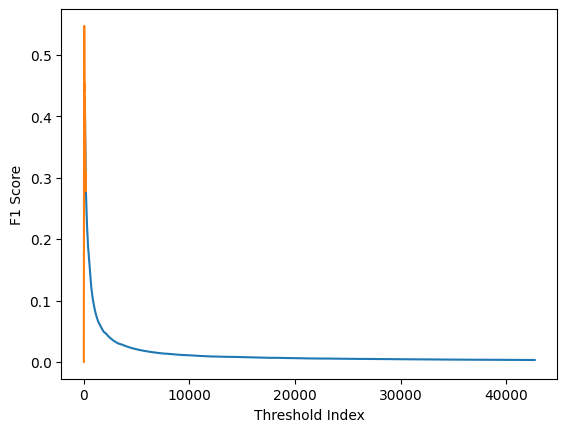

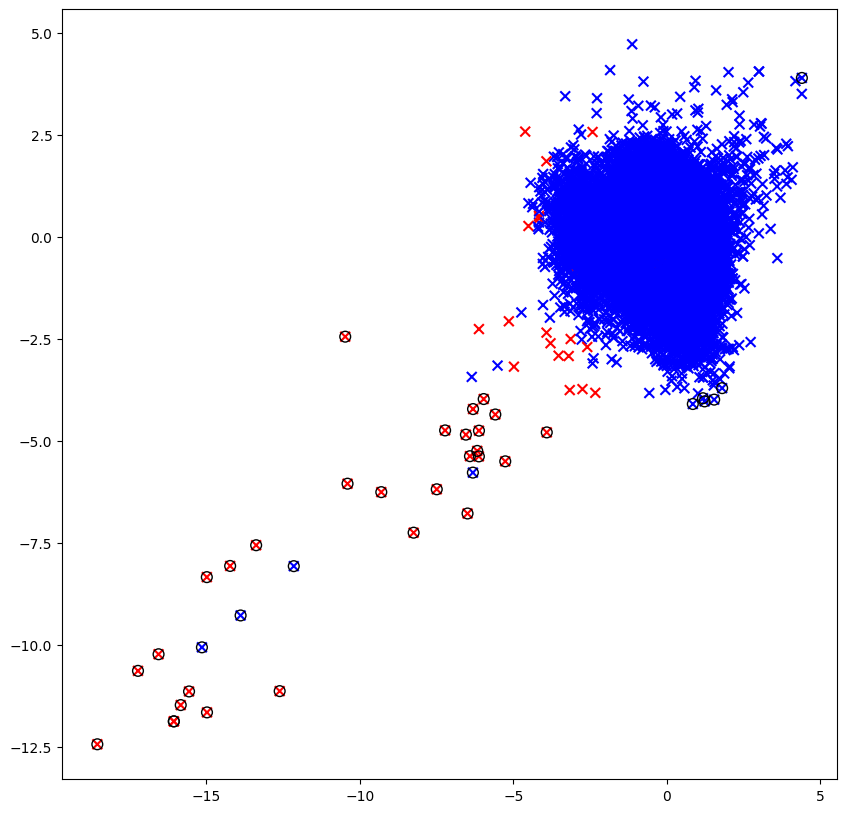

In [ ]:
from sklearn import model_selection
from sklearn.mixture import GaussianMixture
from sklearn.metrics import f1_score

# Initialize the Gaussian Mixture model
model = GaussianMixture(n_components=2, covariance_type='full', random_state=0)

# Fit the model on the training features
model.fit(features_train)

score = model.score_samples(features_val)

# Find a rough best threshold without traversing every threshold
f1_scores_rough = []
step_len_rough = 100

for threshold_index in range(step_len_rough, len(features_val), step_len_rough):
    threshold = sorted(score)[threshold_index]
    predicted_labels = [1 if score < threshold else 0 for score in score]
    f1 = f1_score(y_val, predicted_labels)
    f1_scores_rough.append(f1)

rough_thresholds = range(step_len_rough, len(features_val), step_len_rough)
max_f1_index_rough = np.argmax(f1_scores_rough)
max_f1_rough = f1_scores_rough[max_f1_index_rough]
rough_threshold = rough_thresholds[max_f1_index_rough]


# Create a DataFrame for F1 scores during the rough threshold search
f1_data_rough = {'Threshold Index': rough_thresholds, 'F1 Score': f1_scores_rough}
f1_plot_rough = pd.DataFrame(data=f1_data_rough)
sns.lineplot(data=f1_plot_rough, x='Threshold Index', y='F1 Score')

# Search for the precise threshold in a smaller range around the rough threshold
f1_scores_precise = []
range_len_precise = step_len_rough

for threshold_index in range(int(rough_threshold - range_len_precise), int(rough_threshold + range_len_precise)):
    threshold = sorted(score)[threshold_index]
    predicted_labels = [1 if score < threshold else 0 for score in score]
    f1 = f1_score(y_val, predicted_labels)
    f1_scores_precise.append(f1)

precise_thresholds = range(int(rough_threshold - range_len_precise), int(rough_threshold + range_len_precise))
max_f1_index_precise = np.argmax(f1_scores_precise)
max_f1_precise = f1_scores_precise[max_f1_index_precise]
precise_threshold = precise_thresholds[max_f1_index_precise]

print('Rough: {}'.format({sorted(score)[rough_threshold]}))
print('F1 score: {}'.format(max_f1_rough))
print('Precise: {}'.format({sorted(score)[precise_threshold]}))
print('F1 score: {}'.format(max_f1_precise))

# Create a DataFrame for F1 scores during the precise threshold search
f1_data_precise = {'Threshold Index': precise_thresholds, 'F1 Score': f1_scores_precise}
f1_plot_precise = pd.DataFrame(data=f1_data_precise)
sns.lineplot(data=f1_plot_precise, x='Threshold Index', y='F1 Score')

# Plot outliers with circles
plt.figure(figsize=(10, 10))
plt.scatter(X_val['V12'], X_val['V16'], marker='x', c=y_val.map({0: 'blue', 1: 'red'}), s=50)
outliers = np.nonzero(score < sorted(score)[precise_threshold])[0]
plt.scatter(features_val.values[outliers, 0], features_val.values[outliers, 1], marker='o', facecolor='none', edgecolor='black', s=60)
plt.show()


## **Part 4: Single feature model with two Gaussian distributions. [2 Marks]**
Now we will use two different distributions for fraud and not-fraud transactions.
  1.  Fit a Gaussian distribution ($G_1$) on a feature of **not-fraud transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.25]**
  2. Fit another Gaussian distribution ($G_2$) on the same feature but for **fraud transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.25]**
  3. Compute the score samples ($S$) for both $G_1$ and $G_2$ on the **validation set** to get $S_1$ and $S_2$, respectively. **[0.25]**
  4. Find an optimal $c$ (a real number) that maximizes validation set F1 Score for a model such that if $S_1 < c \times S_2$, the transaction is classified as an anomaly. For example, if $c=1$ we could say that if $S_2$ is greater than $S_1$, ($S_1$<$S_2$) then the transaction is an anomaly (the transaction belongs to the $G_2$ distribution which represents fraud transactions). For start consider $c$ in $[0,10]$ with steps of 0.1, you can change this window in your experiments if needed. **[0.25]**
  5. Repeat the steps above for all the features. What is the best F1 Score that you get for training and validation? Which feature and what c? **[1]**

In [88]:
### YOUR CODE HERE ###
# Pick V11
from sklearn.metrics import f1_score

X_non_fraud_train = X_train[y_train == 0]
X_fraud_train = X_train[y_train == 1]

V11_non_fraud_train = X_non_fraud_train.iloc[:, 10].values.reshape(-1,1)
V11_fraud_train = X_fraud_train.iloc[:, 10].values.reshape(-1,1)

V11_train = X_train.iloc[:, 10].values.reshape(-1,1)
V11_val = X_val.iloc[:, 10].values.reshape(-1,1)

# fit G1 using non fraud data
G1 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
G1.fit(V11_non_fraud_train)
S1 = G1.score_samples(V11_val)

# Fit G2 using fraud data
G2 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
G2.fit(V11_fraud_train)
S2 = G2.score_samples(V11_val)
print(S1,S2)


[-0.93871422 -1.70278724 -1.6888277  ... -2.6730926  -0.92278076
 -1.43729256] [-2.84861632 -3.8385667  -3.82948803 ... -2.10643056 -2.94557373
 -3.65313685]


In [93]:
 #Find an optimal c
F1_score_V11 = []

for c in np.arange(0, 10, 0.1):
  F1 = f1_score(y_val, S1 < c*S2)
  F1_score_V11.append(F1)

optimal_c = round(0.1 * np.argmax(F1_score_V11), 1)
max_F1_score = np.max(F1_score_V11)

print('Optimal c V11:', optimal_c)
print( 'Maximum F1 Score:', max_F1_score)

Optimal c V11: 3.8
Maximum F1 Score: 0.5172413793103449


Q4: The optimal c is 3.8. The maximum F1 of V11 is 0.517.

In [94]:
import sklearn
def find_opt_c(i):
  X_non_fraud_train = X_train[y_train == 0]
  X_fraud_train = X_train[y_train == 1]

  V11_non_fraud_train = X_non_fraud_train.iloc[:, i].values.reshape(-1,1)
  V11_fraud_train = X_fraud_train.iloc[:, i].values.reshape(-1,1)

  V11_train = X_train.iloc[:, i].values.reshape(-1,1)
  V11_val = X_val.iloc[:, i].values.reshape(-1,1)

  # fit G1 using non fraud data
  G1 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
  G1.fit(V11_non_fraud_train)
  S1 = G1.score_samples(V11_val)

  # Fit G2 using fraud data
  G2 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
  G2.fit(V11_fraud_train)
  S2 = G2.score_samples(V11_val)

  # Find an optimal c
  F1_score_V11 = []

  for c in np.arange(0, 10, 0.1):
    F1 = sklearn.metrics.f1_score(y_val, S1 < c*S2)
    F1_score_V11.append(F1)
  optimal_c = round(0.1 * np.argmax(F1_score_V11), 1)
  max_F1_score = np.max(F1_score_V11)

  print('Optimal c V' + str(i+1) + ':', optimal_c)
  print( 'Maximum F1 Score:', max_F1_score)

  return optimal_c, max_F1_score


In [95]:
# find opt c for all features
max_score = -1
opt_c_all = 0
idx = 0
f1_score = 0
for i in range(28):
  opt_c, score = find_opt_c(i)
  if score > max_score:
    opt_c_all = opt_c
    max_score = score
    idx = i
print('\n\n final result: \n\n')
print('Overall best feature is: ', str(idx))
print('Overall optimal c V' + str(idx+1) + ':', opt_c_all)
print( 'Overall maximum F1 Score:', max_score)

Optimal c V1: 5.0
Maximum F1 Score: 0.0970873786407767
Optimal c V2: 3.7
Maximum F1 Score: 0.1111111111111111
Optimal c V3: 9.9
Maximum F1 Score: 0.2736842105263158
Optimal c V4: 4.5
Maximum F1 Score: 0.36363636363636365
Optimal c V5: 5.0
Maximum F1 Score: 0.14606741573033707
Optimal c V6: 1.9
Maximum F1 Score: 0.10687022900763357
Optimal c V7: 7.8
Maximum F1 Score: 0.20779220779220778
Optimal c V8: 4.9
Maximum F1 Score: 0.03870967741935484
Optimal c V9: 3.3
Maximum F1 Score: 0.3655913978494624
Optimal c V10: 8.6
Maximum F1 Score: 0.34090909090909094
Optimal c V11: 3.8
Maximum F1 Score: 0.5172413793103449
Optimal c V12: 4.8
Maximum F1 Score: 0.611111111111111
Optimal c V13: 1.1
Maximum F1 Score: 0.005935976256094975
Optimal c V14: 9.3
Maximum F1 Score: 0.6371681415929203
Optimal c V15: 1.2
Maximum F1 Score: 0.0060790273556231
Optimal c V16: 4.6
Maximum F1 Score: 0.5688073394495413
Optimal c V17: 7.2
Maximum F1 Score: 0.6545454545454547
Optimal c V18: 4.4
Maximum F1 Score: 0.38383838383

**The feature V17 has the best F1 Score that for both training and validation, is 0.655. The optimal c of V17 is 7.2. **

## **Part 5: Multivariate and Mixture of Gaussians Distribution [4 Marks]**
We now want to build an outlier detection model that performs well in terms of F1 score. To design your model, you can benefit from:

*   No restrictions on the number of features - use as few or as many as you want! (multivariate).
*   To fit your model, you can take advantage of the Gaussian mixture model, where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html).
*   You can choose to fit your Gaussians on not-fraud transactions or to both classes.


It is up to you how to design your model. Try at least 10 different models and report the AUC for both training and validation sets (if applicable) and the best F1 score for both training and validation sets for each model. What kind of model works better? How many features are best (and which ones)? How many Gaussians? How many components? Summarize your findings with tables or plots. **[4]**


**HINT !**

You might want to try a two-gaussian model, multiple features, a single component for the valid transaction, and multiple components for fraud ones! Why does it make sense to have multiple components for fraud transactions?

In [100]:
### YOUR CODE HERE ###
df = pd.read_csv("creditcard.csv")
label = df['Class']
y = df['Class']
feature_name = df.columns.drop(['Class','Amount','Time'])
df = df.drop(['Class','Amount','Time'], axis = 1)

X_train, X_tmp, y_train, y_tmp = train_test_split(df, label, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=0)
# make fraud and non-fraud data


both fraud and non fraud

# of components = 2

features used: ['V4']


Rough: {-5.806511529106253}
F1 score: 0.29940119760479045
Precise: {-7.597746450284921}
F1 score: 0.3619047619047619
AUC: 0.8899817973012977


both fraud and non fraud

# of components = 3

features used: ['V4']


Rough: {-6.461160120878429}
F1 score: 0.2275449101796407
Precise: {-7.2799903061260345}
F1 score: 0.2666666666666666
AUC: 0.891903893110058


both fraud and non fraud

# of components = 4

features used: ['V4']


Rough: {-6.303377377915067}
F1 score: 0.23952095808383234
Precise: {-7.488243019120292}
F1 score: 0.2769230769230769
AUC: 0.8911491214625984


both fraud and non fraud

# of components = 5

features used: ['V4']


Rough: {-6.377813672986628}
F1 score: 0.23952095808383234
Precise: {-7.549529364134443}
F1 score: 0.2748091603053435
AUC: 0.896972795328464


both fraud and non fraud

# of components = 2

features used: ['V10']




KeyboardInterrupt: ignored

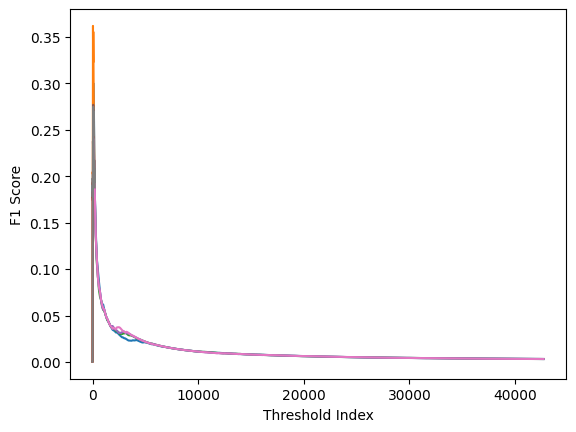

In [103]:
### YOUR CODE HERE ###
from sklearn.metrics import f1_score
num_of_comp = [2, 3, 4, 5] # do a grid search on number of commponents we want
# feature 10, 14, 4 are the best 3 among all, so choose any combination among these three features
feature_list = [
    [3],
    [9],
    [10],
    [9, 13],
    [9, 3],
    [3, 13],
    [9, 13, 3]
] # 7 valid combinations

def get_model(i, features, only_non_fraud):

  if only_non_fraud:
    print('only non fraud\n')
    X_ = X_train[y_train == 0]
    features_val = X_val[y_val == 0]
  else:
    print('both fraud and non fraud\n')
    X_ = X_train
    features_val = X_val

  features_print = ['V' + str(features[i] + 1) for i in range(len(features))]
  print('# of components = {}\n'.format(i))
  print('features used: ' + str(features_print))
  print('\n')
  model = GaussianMixture(n_components = i, covariance_type = 'full', random_state = 0)
  model.fit(X_.iloc[:, features].values)

  score = model.score_samples(features_val.iloc[:, features].values)
  fp, tp, _ = roc_curve(y_val, 1 - score)
  current_AUC = auc(fp, tp)

  f1_scores_rough = []
  step_len_rough = 100

  for threshold_index in range(step_len_rough, len(features_val), step_len_rough):
      threshold = sorted(score)[threshold_index]
      predicted_labels = [1 if score < threshold else 0 for score in score]
      f1 = f1_score(y_val, predicted_labels)
      f1_scores_rough.append(f1)

  rough_thresholds = range(step_len_rough, len(features_val), step_len_rough)
  max_f1_index_rough = np.argmax(f1_scores_rough)
  max_f1_rough = f1_scores_rough[max_f1_index_rough]
  rough_threshold = rough_thresholds[max_f1_index_rough]

  # Create a DataFrame for F1 scores during the rough threshold search
  f1_data_rough = {'Threshold Index': rough_thresholds, 'F1 Score': f1_scores_rough}
  f1_plot_rough = pd.DataFrame(data=f1_data_rough)
  sns.lineplot(data=f1_plot_rough, x='Threshold Index', y='F1 Score')

  # Search for the precise threshold in a smaller range around the rough threshold
  f1_scores_precise = []
  range_len_precise = step_len_rough

  for threshold_index in range(int(rough_threshold - range_len_precise), int(rough_threshold + range_len_precise)):
      threshold = sorted(score)[threshold_index]
      predicted_labels = [1 if score < threshold else 0 for score in score]
      f1 = f1_score(y_val, predicted_labels)
      f1_scores_precise.append(f1)

  precise_thresholds = range(int(rough_threshold - range_len_precise), int(rough_threshold + range_len_precise))
  max_f1_index_precise = np.argmax(f1_scores_precise)
  max_f1_precise = f1_scores_precise[max_f1_index_precise]
  precise_threshold = precise_thresholds[max_f1_index_precise]

  print('Rough: {}'.format({sorted(score)[rough_threshold]}))
  print('F1 score: {}'.format(max_f1_rough))
  print('Precise: {}'.format({sorted(score)[precise_threshold]}))
  print('F1 score: {}'.format(max_f1_precise))
  print('AUC: {}'.format(current_AUC))

  print('\n')
  # Create a DataFrame for F1 scores during the precise threshold search
  f1_data_precise = {'Threshold Index': precise_thresholds, 'F1 Score': f1_scores_precise}
  f1_plot_precise = pd.DataFrame(data=f1_data_precise)
  sns.lineplot(data=f1_plot_precise, x='Threshold Index', y='F1 Score')

  return current_AUC

best_features = []
best_scores = 0.0
best_n_comps = 0
for features in feature_list:
  for i in num_of_comp:
    simple_comb = [i, features]
    current_score = get_model(i, features, False)
    if current_score > best_scores:
      best_scores = current_score
      best_features = features
      best_n_comps = i


print('\n\n best features {}'.format(str(best_features)))
print('\n\n best number of components {}'.format(best_n_comps))
print('\n\n best AUC score {}'.format(best_scores))



In [ ]:
# best features are [V4, V14, V10] and n components = 4
# fit another model using those features and non-fraud data only
features = [3, 9, 13]
X_ = X_train[y_train == 0]
features_val = X_val

features_print = ['V' + str(features[i] + 1) for i in range(len(features))]
print('# of components = {}\n'.format(4))
print('features used: ' + str(features_print))
print('\n')
model = GaussianMixture(n_components = 4, covariance_type = 'full', random_state = 0)
model.fit(X_.iloc[:, features].values)

score = model.score_samples(features_val.iloc[:, features].values)
fp, tp, _ = roc_curve(y_val, 1 - score)
current_AUC = auc(fp, tp)

f1_scores_rough = []
step_len_rough = 100

for threshold_index in range(step_len_rough, len(features_val), step_len_rough):
    threshold = sorted(score)[threshold_index]
    predicted_labels = [1 if score < threshold else 0 for score in score]
    f1 = f1_score(y_val, predicted_labels)
    f1_scores_rough.append(f1)

rough_thresholds = range(step_len_rough, len(features_val), step_len_rough)
max_f1_index_rough = np.argmax(f1_scores_rough)
max_f1_rough = f1_scores_rough[max_f1_index_rough]
rough_threshold = rough_thresholds[max_f1_index_rough]

# Create a DataFrame for F1 scores during the rough threshold search
f1_data_rough = {'Threshold Index': rough_thresholds, 'F1 Score': f1_scores_rough}
f1_plot_rough = pd.DataFrame(data=f1_data_rough)
sns.lineplot(data=f1_plot_rough, x='Threshold Index', y='F1 Score')

# Search for the precise threshold in a smaller range around the rough threshold
f1_scores_precise = []
range_len_precise = step_len_rough

for threshold_index in range(int(rough_threshold - range_len_precise), int(rough_threshold + range_len_precise)):
    threshold = sorted(score)[threshold_index]
    predicted_labels = [1 if score < threshold else 0 for score in score]
    f1 = f1_score(y_val, predicted_labels)
    f1_scores_precise.append(f1)

precise_thresholds = range(int(rough_threshold - range_len_precise), int(rough_threshold + range_len_precise))
max_f1_index_precise = np.argmax(f1_scores_precise)
max_f1_precise = f1_scores_precise[max_f1_index_precise]
precise_threshold = precise_thresholds[max_f1_index_precise]

print('Rough: {}'.format({sorted(score)[rough_threshold]}))
print('F1 score: {}'.format(max_f1_rough))
print('Precise: {}'.format({sorted(score)[precise_threshold]}))
print('F1 score: {}'.format(max_f1_precise))
print('AUC: {}'.format(current_AUC))

print('\n')
# Create a DataFrame for F1 scores during the precise threshold search
f1_data_precise = {'Threshold Index': precise_thresholds, 'F1 Score': f1_scores_precise}
f1_plot_precise = pd.DataFrame(data=f1_data_precise)
sns.lineplot(data=f1_plot_precise, x='Threshold Index', y='F1 Score')

# of components = 4

features used: ['V4', 'V10', 'V14']




In [ ]:
current_AUC

0.9576334112249276

The best model is model with features V4, V10 and V14. The n_components equal to 4. The line plot summary is above.

## **Part 6: Evaluating performance on test set: [1 Mark]**
**Which model worked better?** Pick your best model among all models and apply it to your test set. Report the F1 Score, Precision and Recall on the test set. **[1]**


0.9630578420336757
Rough: {-13.96329032237317}
F1 score: 0.6000000000000001
Precise: {-16.39342538998733}
F1 score: 0.6666666666666667
AUC: 0.9630578420336757




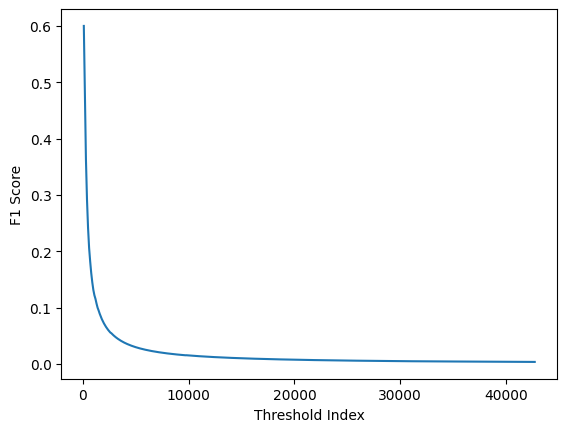

In [ ]:
### YOUR CODE HERE ###
from sklearn.metrics import f1_score
score = model.score_samples(X_test.iloc[:, features].values)
fp, tp, _ = roc_curve(y_test, 1 - score)
current_AUC = auc(fp, tp)
print(current_AUC)
f1_scores_rough = []
step_len_rough = 100

for threshold_index in range(step_len_rough, len(X_test), step_len_rough):
    threshold = sorted(score)[threshold_index]
    predicted_labels = [1 if score < threshold else 0 for score in score]
    f1 = f1_score(y_test, predicted_labels)
    f1_scores_rough.append(f1)

rough_thresholds = range(step_len_rough, len(features_val), step_len_rough)
max_f1_index_rough = np.argmax(f1_scores_rough)
max_f1_rough = f1_scores_rough[max_f1_index_rough]
rough_threshold = rough_thresholds[max_f1_index_rough]

# Create a DataFrame for F1 scores during the rough threshold search
f1_data_rough = {'Threshold Index': rough_thresholds, 'F1 Score': f1_scores_rough}
f1_plot_rough = pd.DataFrame(data=f1_data_rough)
sns.lineplot(data=f1_plot_rough, x='Threshold Index', y='F1 Score')

# Search for the precise threshold in a smaller range around the rough threshold
f1_scores_precise = []
range_len_precise = step_len_rough

for threshold_index in range(int(rough_threshold - range_len_precise), int(rough_threshold + range_len_precise)):
    threshold = sorted(score)[threshold_index]
    predicted_labels = [1 if score < threshold else 0 for score in score]
    f1 = f1_score(y_test, predicted_labels)
    f1_scores_precise.append(f1)

precise_thresholds = range(int(rough_threshold - range_len_precise), int(rough_threshold + range_len_precise))
max_f1_index_precise = np.argmax(f1_scores_precise)
max_f1_precise = f1_scores_precise[max_f1_index_precise]
precise_threshold = precise_thresholds[max_f1_index_precise]

print('Rough: {}'.format({sorted(score)[rough_threshold]}))
print('F1 score: {}'.format(max_f1_rough))
print('Precise: {}'.format({sorted(score)[precise_threshold]}))
print('F1 score: {}'.format(max_f1_precise))
print('AUC: {}'.format(current_AUC))

print('\n')

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

Precision: 0.34
Recall: 0.85


**The best model I pick is Model with features: V4, V10 and V14. The F1 score is 0.667. The precision is 0.34, recall is 0.85. The AUC is 0.96.**

## **Part 7: Is Gaussian the only useful distribution? [1 Mark]**

Search for other distributions that could be used to model the data. How popular are they? Is there a specific situation where a distribution works better? How can we find a suitable distribution to model our data? Do not forget to include your references.




##1 Exponential Distribution:
      The exponential distribution is widely used when time is continuous. It works better when modeling the time between events in a Poisson process. The distribution can be find when the event happen random over time.
      
##2 Poisson Distribution:
      The poisson distribution is quite popular. It works better when the time period or the space is fixed and event happen randomly. It usually used to count the number of events happen in a fixed time period. The distribution can be found using a constant average rate.
##3 Gamma Distribution:
      This is very popular in model building process. It can be used for outlier detection, while it can deal with more complex multivariate model, and can be fused with some popular searching algorithm. It's often used when the data doesn't follow a simple exponential distribution

refs:

https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html

https://towardsdatascience.com/understanding-anomaly-detection-in-python-using-gaussian-mixture-model-e26e5d06094b

https://www.researchgate.net/publication/367294208_A_Method_for_Detecting_Outliers_from_the_Gamma_Distribution

